In [ ]:
from google.colab import drive

In [ ]:
import keras
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')



from collections import Counter
import nltk
from nltk.tokenize import WordPunctTokenizer

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer


import os
import nltk
import numpy as np
import json
import matplotlib.pyplot as plt


from nltk.stem.lancaster import LancasterStemmer



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
drive.mount("/content/drive/")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#load train data
cols = ['id', 'tweet', 'emotion', 'intensity']
path = "/content/drive/My Drive/Tweet Emotion Intensity Dataset/"
anger_train = pd.read_csv(path + 'anger_train.txt', header=None, sep='\t', names=cols, index_col=0)
fear_train = pd.read_csv(path + 'fear_train.txt', header=None, sep='\t', names=cols, index_col=0)
sad_train = pd.read_csv(path + 'sadness_train.txt', header=None, sep='\t', names=cols, index_col=0)
joy_train = pd.read_csv(path + 'joy_train.txt', header=None, sep='\t', names=cols, index_col=0)

joy_train

,tweet,emotion,intensity
id,,,
30000,Just got back from seeing @GaryDelaney in Burs...,joy,0.980
30001,Oh dear an evening of absolute hilarity I don'...,joy,0.958
30002,Been waiting all week for this game â¤ï¸â¤ï...,joy,0.940
30003,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,0.938
30004,I feel so blessed to work with the family that...,joy,0.938
...,...,...,...
30818,It's just the lack of company and liveliness o...,joy,0.058
30819,Quinn's short hair makes me sad. #glee,joy,0.040
30820,hate overthinking e v e r y t h i n g like i j...,joy,0.040


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, f

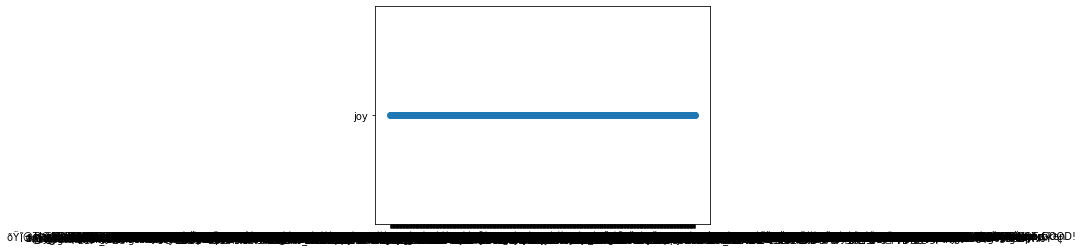

In [ ]:
j_tweet=joy_train['tweet']
j_emotion=joy_train['emotion']
plt.scatter(j_tweet, j_emotion)
plt.show()

In [ ]:
#gather training files in one
frames_training = [anger_train, fear_train, sad_train, joy_train]
data_training = pd.concat(frames_training)
data_training.reset_index(inplace=True)
data_training.emotion.value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: emotion, dtype: int64

In [ ]:
data_training

,id,tweet,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,30818,It's just the lack of company and liveliness o...,joy,0.058
3609,30819,Quinn's short hair makes me sad. #glee,joy,0.040
3610,30820,hate overthinking e v e r y t h i n g like i j...,joy,0.040
3611,30821,People who cheer for sports teams completely o...,joy,0.020


In [ ]:
#load test data
cols = ['id', 'tweet', 'emotion', 'intensity']
path = "/content/drive/My Drive/Tweet Emotion Intensity Dataset/"
anger_test = pd.read_csv(path + 'anger_test.txt', header=None, sep='\t', names=cols, index_col=0)
fear_test = pd.read_csv(path + 'fear_test.txt', header=None, sep='\t', names=cols, index_col=0)
sad_test = pd.read_csv(path + 'sad_test.txt', header=None, sep='\t', names=cols, index_col=0)
joy_test = pd.read_csv(path + 'joy_test.txt', header=None, sep='\t', names=cols, index_col=0)

joy_test

,tweet,emotion,intensity
id,,,
30902,You must be knowing #blithe means (adj.) Happ...,joy,0.583
30903,Old saying 'A #smile shared is one gained for ...,joy,0.500
30904,Bridget Jones' Baby was bloody hilarious ðŸ˜… ...,joy,0.860
30905,@Elaminova sparkling water makes your life spa...,joy,0.521
30906,I'm tired of everybody telling me to chill out...,joy,0.042
...,...,...,...
31611,With a very tired body and mind and sparkling ...,joy,0.417
31612,I refuse to be a chirp chirp girl,joy,0.146
31613,It was very hard to stifle my laughter after I...,joy,0.646


In [ ]:
#gather test files in one
frames_test = [anger_test, fear_test, sad_test, joy_test]
data_test = pd.concat(frames_test)
data_test.reset_index(inplace=True)
data_test.emotion.value_counts()


fear       995
anger      760
joy        714
sadness    673
Name: emotion, dtype: int64

In [ ]:


print(data_test)
print(type(data_test))

print(data_training)
print(type(data_training))



         id  ... intensity
0     10941  ...     0.319
1     10942  ...     0.144
2     10943  ...     0.898
3     10944  ...     0.271
4     10945  ...     0.646
...     ...  ...       ...
3137  31611  ...     0.417
3138  31612  ...     0.146
3139  31613  ...     0.646
3140  31614  ...     0.620
3141  31615  ...     0.580

[3142 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
         id  ... intensity
0     10000  ...     0.938
1     10001  ...     0.896
2     10002  ...     0.896
3     10003  ...     0.896
4     10004  ...     0.896
...     ...  ...       ...
3608  30818  ...     0.058
3609  30819  ...     0.040
3610  30820  ...     0.040
3611  30821  ...     0.020
3612  30822  ...     0.019

[3613 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#compine test and train sets in one dataset
frames_all = [anger_train, fear_train, sad_train, joy_train,anger_test, fear_test, sad_test, joy_test]
all_data = pd.concat(frames_all)
all_data.reset_index(inplace=True)
all_data.emotion.value_counts()

fear       2142
anger      1617
joy        1537
sadness    1459
Name: emotion, dtype: int64

In [ ]:
print(all_data.shape)
print(type(all_data))

(6755, 4)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
#########################################untill here we have : data_test ,data_training ,all_data

**Cleaning the dataset**

remove everything from the reviews but letters. This will involve removing all punctuation marks such as commas, question marks, etc. The `sub` function from the `re` module can be used to replace the punctuation marks. After removing the punctuation marks, convert all the reviews to lower case.

In [ ]:

import re
#building the function
def clean_data(review):
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    return review
#apply
data_training['tweet'] = data_training['tweet'].apply(clean_data)
data_test['tweet']=data_training['tweet'].apply(clean_data)

**Removing stop words**

The tweets also contain common words such as ‘the’, ‘at’, Let’s get rid of those.
To remove them, using (nltk). Let’s import the package and download the stop words.

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#build the function

def remove_stop_words(review):
  review_minus_sw = []
  stop_words = stopwords.words('english')
  review = review.split()
  review = [review_minus_sw.append(word) for word in review if word not in stop_words]
  review = ' '.join(review_minus_sw)
  return review

  #apply
data_training['tweet'] = data_training['tweet'].apply(remove_stop_words)
data_test['tweet'] = data_training['tweet'].apply(remove_stop_words)

**Stemming and lemmatizing**


Stemming : convert the words in the reviews to their root form.
This process is important because it reduces the number of words that will be fed to the machine learning model.
`nltk` can assist  in converting the words in their root form.
This can be done using the `WordNetLemmatizer` utility.
 This can also be done using the `PorterStemmer`.
Stemmers use algorithms to remove suffixes and prefixes from words and the final words may not be the dictionary representation of a word.
for example:  example -> examp
lemmatizers will usually convert a word to the dictionary representatio

In [ ]:
#pply the `WordNetLemmatizer`
#creating the function
nltk.download('wordnet')
#WordNet is a lexical database of English.
#Using synsets, helps find conceptual relationships between words
# such as hypernyms, hyponyms, synonyms, antonyms etc.

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

def lematize(review):
    review = review.split()
    review = [lemmatizer.lemmatize(w) for w in review]
    review = ' '.join(review)
    return review
    #applying
data_training['tweet'] = data_training['tweet'].apply(lematize)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
type(data_training['tweet'])

pandas.core.series.Series

**Creating a bag of words model**
As of this moment, the reviews are still in text form. However, they have to be converted into some numeric representation before they can be passed to the machine learning model. A common way for representing the reviews is through the bag of words model. This is how the bag of words model is created:

Group all the reviews into a corpus. A corpus simply means a collection of many documents in this case the reviews.
Take all the words in the corpus and create a column with each word.
Represent each review with a row.
If a certain word exists in the review, represent it by a 1, and if the word doesn’t exist in the review, represent it with a 0.
In the above representation, each word represents a single feature. The above process will result in a sparse matrix.


In [ ]:
corpus = list(data_training['tweet'])
#type(corpus)
corpus_test = list(data_test['tweet'])
type(corpus_test)

list

The numerical representation mentioned above can be obtained using the `CountVectorizer` from Scikit-learn. The function requires us to define the maximum number of words that will be used in the bag of words. The next step is to fit the instantiated `CountVectorizer` to the reviews.  

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer(max_features = 1000)
 # Stop words are common words in English that don't tell us anything about the polarity of a review.
    # Such words include the, that, and a
# Converts a collection of text documents to a matrix of token counts
# max_features = maximum number of words we'd like to have in our bag of words model
#X_train = cv.fit_transform(corpus).toarray()
#X_train
#y = data_training['emotion'].values

#cv.get_feature_names()

**From occurrences to frequencies**
dividing the total occurrences of a word by the total number of words. This results in new features known as tf, short for Term Frequencies. The problem with this is that common words will tend to have a higher tf. This challenge is addressed by downscaling the weight carried by the common words. The downscaling is referred to as tf–idf short for Term Frequency Inverse Document Frequency.


In [ ]:

#from sklearn.feature_extraction.text import TfidfTransformer
#tf_transformer = TfidfTransformer()
#X = tf_transformer.fit_transform(X).toarray()

**Fitting CountVectorizer followed by TfidfTransformer**

Scikit-learn **TfidfVectorizer** used to apply both of them

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(max_features =1000)
X_train = tfidfVectorizer.fit_transform(corpus).toarray()


x_test= tfidfVectorizer.fit_transform(corpus_test).toarray()
x_test
#X_train[0:10,0:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#### the input now  training_data['emotion'] is clean  named  x_train

**Padding**

At the moment each review is represented by a sequence of integers.
The only problem here is that the sequences are of different lengths.
the data passed to a machine learning model is of the same length.
Therefore, the sequences have to be forced to be of the same length.
This is done by padding shorter sequences with zeros and dropping off some integers on very long sequences.
This means that we have to define the maximum length of every sequence. Let’s use 100 now.



In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 164
X_train_pad = pad_sequences(X_train, maxlen=max_length, padding='post')
x_test_pad = pad_sequences(x_test, maxlen=max_length, padding='post')
X_train_pad[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
X_train_pad = list(X_train_pad)
x_test_pad = list(x_test_pad)


In [ ]:

    ######  make a classification label list encoding our 4 classes **

###############################################################33remmember up
encoded_emotions_training=[]
for j in data_training['emotion']:
  if j == "anger":
    encoded_emotions_training.append([1,0,0,0])
  elif j == "fear":
    encoded_emotions_training.append([0,1,0,0])
  elif j == "sadness":
    encoded_emotions_training.append([0,0,1,0])
  elif j == "joy":
    encoded_emotions_training.append([0,0,0,1])
  else:
    pass

In [ ]:
encoded_emotions_test=[]
for j in data_test['emotion']:
  if j == "anger":
    encoded_emotions_test.append([1,0,0,0])
  elif j == "fear":
    encoded_emotions_test.append([0,1,0,0])
  elif j == "sadness":
    encoded_emotions_test.append([0,0,1,0])
  elif j == "joy":
    encoded_emotions_test.append([0,0,0,1])
  else:
    pass


In [ ]:
encoded_emotions_training = list(encoded_emotions_training)
encoded_emotions_test = list(encoded_emotions_test)

Shuffle the dataset

In [ ]:
import random
train = list(zip(X_train_pad, encoded_emotions_training))
test = list(zip(x_test_pad, encoded_emotions_test))

X_train_pad, encoded_emotions_training = zip(*train)
x_test_pad, encoded_emotions_test = zip(*test)


random.shuffle(train)
random.shuffle(test)

**CNN**

using TensorFlow to build the convolutional neural network for text classification

**1-D Convolutions over text**
The convolution network will be made of of the following:

- An embedding layer that turns the data into dense vectors of fixed size. More on this later.
- A `Conv1D` with 128 units with the `relu` activation function.
- A `GlobalMaxPooling1D` layer that downsamples the input by taking the maximum value.
- A `Dense` layer with 10 units for the fully connected layer.
- An output layer with the sigmoid activation function because this is a binary problem.

**Data In CNN**

As seen earlier, the data has to be converted in some numerical representation.
 The `one_hot` function can be used to do this.
The function will encode the reviews into a list of integers. It expects the following arguments:

- `text` that is the text to be encoded
- `n` the size of the vocabulary
- `filters` specify the characters to be removed from the reviews such as punctuation marks and any other special characters
- `lower` indicates if the reviews should be converted to lower case or not
- `split` dictates how the reviews should be split

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from keras.layers import Conv1D , Input , Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Dense
from keras import layers
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# A integer input for vocab indices.
inputs = keras.Input(shape=(None,), dtype="int64")
max_features=1000
embedding_dim = 50
x = layers.Embedding(max_features, embedding_dim)(inputs)
x = layers.Dropout(0.5)(x)

# Conv1D + global max pooling
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = layers.GlobalMaxPooling1D()(x)

# I added a vanilla hidden layer:
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.5)(x)

predictions = layers.Dense(4, activation="sigmoid", name="predictions")(x)

model_1 = keras.Model(inputs, predictions)

# Compile the model with binary crossentropy loss and an adam optimizer.
model_1.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
#model_1.compile(loss="SoftMax", optimizer="adam", metrics=["accuracy"])

In [ ]:
#prepare the model for training. Let’s apply the common `Adam` optimizer and the `binary_crossentropy` loss function.
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
x_test_pad=np.array(x_test_pad)
X_train_pad=np.array(X_train_pad)
encoded_emotions_training=np.array(encoded_emotions_training)
encoded_emotions_test=np.array(encoded_emotions_test)

In [ ]:
# Fit the model using the train and test datasets.
model_1.fit(X_train_pad, encoded_emotions_training, epochs=20)

Epoch 1/20
113/113 [==============================] - 4s 38ms/step - loss: 1.3688 - accuracy: 0.3186
Epoch 2/20
113/113 [==============================] - 4s 37ms/step - loss: 1.3690 - accuracy: 0.3188
Epoch 3/20
113/113 [==============================] - 4s 38ms/step - loss: 1.3689 - accuracy: 0.3188
Epoch 4/20
113/113 [==============================] - 4s 37ms/step - loss: 1.3691 - accuracy: 0.3186
Epoch 5/20
113/113 [==============================] - 4s 37ms/step - loss: 1.3697 - accuracy: 0.3180
Epoch 6/20
113/113 [==============================] - 4s 37ms/step - loss: 1.3694 - accuracy: 0.3186
Epoch 7/20
113/113 [==============================] - 4s 37ms/step - loss: 1.3688 - accuracy: 0.3188
Epoch 8/20
113/113 [==============================] - 4s 38ms/step - loss: 1.3691 - accuracy: 0.3186
Epoch 9/20
113/113 [==============================] - 4s 37ms/step - loss: 1.3690 - accuracy: 0.3188
Epoch 10/20
113/113 [==============================] - 4s 37ms/step - loss: 1.3697 - accura

In [ ]:
print(model_1.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, None)]            0         
                                                                 
 embedding_5 (Embedding)     (None, None, 50)          50000     
                                                                 
 dropout_10 (Dropout)        (None, None, 50)          0         
                                                                 
 conv1d_10 (Conv1D)          (None, None, 128)         44928     
                                                                 
 conv1d_11 (Conv1D)          (None, None, 128)         114816    
                                                                 
 global_max_pooling1d_5 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                           

In [ ]:
result_1 = model_1.predict(x_test_pad)

In [ ]:
result_1[1:5] , encoded_emotions_test[1:5]

(array([[0.48944637, 0.55891037, 0.46867815, 0.4767882 ],
        [0.48944637, 0.55891037, 0.46867815, 0.4767882 ],
        [0.48944637, 0.55891037, 0.46867815, 0.4767882 ],
        [0.48944637, 0.55891037, 0.46867815, 0.4767882 ]], dtype=float32),
 array([[1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]]))

In [ ]:
model_1.evaluate(x_test_pad, encoded_emotions_test)

99/99 [==============================] - 1s 8ms/step - loss: 1.4137 - accuracy: 0.3176


[1.4137200117111206, 0.3176320791244507]

In [ ]:

#Defining the model to be optimized
vocab_size =[]
max_length = []
#def model_to_optimize(num_filters, kernel_size): #**optimization** in TensorFlow  a Scikit-learn wrapper enables  to apply grid search to a neural network.

 # model = Sequential([
 # embedding_layer,
 # Conv1D(num_filters, kernel_size, activation='relu'),
 # GlobalMaxPooling1D(),
 # Dense(10, activation='relu'),
 # Dense(1, activation='sigmoid')])
 # model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  #return model